In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('customer_shopping_data.csv')

In [11]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### Checking data types of each column in dataset

In [13]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

### Check any null values


In [15]:
df.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

### Description of numerical columns in dataset

In [19]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [21]:
df.info

<bound method DataFrame.info of       invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19

### Visualizing gender

gender
Female    59482
Male      39975
Name: count, dtype: int64


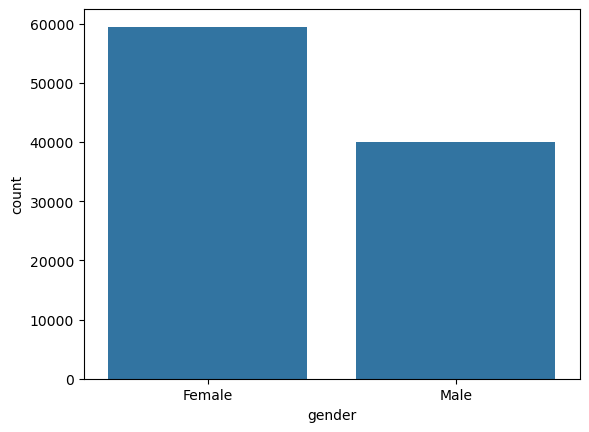

In [23]:
print(df.gender.value_counts())
sns.countplot(data=df,x='gender')
plt.show()

In [29]:
print("customer id :")
print(df.customer_id.nunique())
print("invoice no:")
print(df.invoice_no.nunique())

customer id :
99457
invoice no:
99457


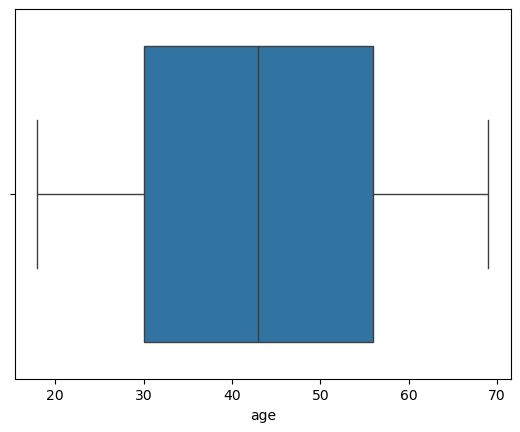

In [37]:
sns.boxplot(data=df,x='age')
plt.show()

In [41]:
pd.crosstab(df.gender,df.category,values=((df['age']<= 18) & (df['age'] <40)),aggfunc = 'sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,66,386,165,155,101,56,52,98
Male,40,260,102,126,70,52,37,78


In [43]:
pd.crosstab(df.gender,df.category,values=((df['age']< 40) & (df['age'] <69)),aggfunc = 'sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,1227,8830,3813,3715,2498,1283,1293,2590
Male,874,5843,2553,2615,1748,854,854,1740


### Visualizing Category

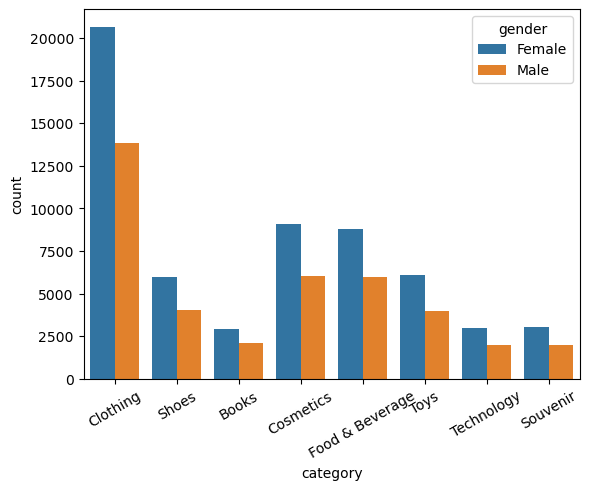

In [49]:
sns.countplot(data=df,x='category',hue='gender')
plt.xticks(rotation=30)  # Adjust the rotation angle as needed
plt.show()

In [53]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Create a new column in the DataFrame with the age range labels
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Use pd.crosstab to count occurrences of age ranges for each category
cross_tab = pd.crosstab(df['category'], df['AgeRange'])
cross_tab

AgeRange,0-20,21-30,31-40,41-50,51-60,61+
category,,,,,,
Books,289,964,946,952,966,864
Clothing,1974,6752,6627,6662,6548,5924
Cosmetics,825,2894,2950,2881,2934,2613
Food & Beverage,863,2824,2931,2812,2796,2550
Shoes,575,1954,1907,1944,1902,1752
Souvenir,277,974,992,930,975,851
Technology,252,991,1006,965,932,850
Toys,569,2047,1907,1920,1879,1765


AgeRange
21-30    0.195059
31-40    0.193712
41-50    0.191701
51-60    0.190354
61+      0.172627
0-20     0.056547
Name: proportion, dtype: float64

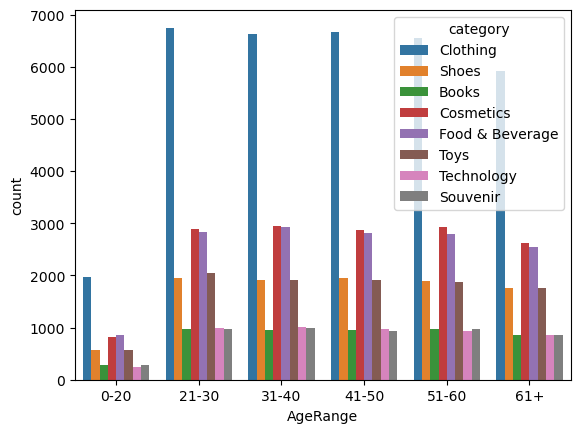

In [55]:
sns.countplot(data=df,x='AgeRange', hue='category')
df['AgeRange'].value_counts(normalize=True)

In [59]:
print(df.gender.value_counts())
pd.crosstab([df.gender,df.AgeRange,df.quantity],df.category,values=df.quantity,aggfunc='sum')

gender
Female    59482
Male      39975
Name: count, dtype: int64


category                  Books  Clothing  Cosmetics  Food & Beverage  Shoes  \
gender AgeRange quantity                                                       
Female 0-20     1            33       241         75              102     71   
                2            72       494        188              210    120   
                3            75       639        351              360    216   
                4           156       924        384              368    292   
                5           215      1175        515              445    355   
       21-30    1           109       775        350              332    224   
                2           194      1620        698              630    468   
                3           303      2475       1017              993    669   
                4           456      3192       1520             1312    904   
                5           615      4275       1760             1725   1140   
       31-40    1           104       807        345              345    226   
                2           208      1678        646              632    442   
                3           384      2448       1122             1068    711   
                4           360      3172       1344             1484    840   
                5           690      3815       1885             1765   1190   
       41-50    1           117       793        350              354    238   
                2           224      1634        702              618    478   
                3           405      2346       1107             1089    684   
                4           412      3156       1320             1384    964   
                5           530      3940       1595             1605   1135   
       51-60    1           120       735        367              348    236   
                2           240      1546        712              658    492   
                3           345      2463       1023              951    579   
                4           468      3276       1364             1316    964   
                5           480      3825       1790             1650   1140   
       61+      1            85       709        318              325    199   
                2           192      1404        624              654    406   
                3           330      2058        930              885    636   
                4           384      2804       1324             1204    892   
                5           470      3620       1535             1550    995   
Male   0-20     1            17       198         75               66     27   
                2            42       296        152              164    106   
                3            81       471        186              216    159   
                4           104       588        240              252    204   
                5           110       785        335              360    220   
       21-30    1            89       568        225              227    142   
                2           170      1116        434              504    336   
                3           219      1542        747              687    558   
                4           344      2100        856              908    568   
                5           435      2620       1095             1190    905   
       31-40    1            74       545        228              238    137   
                2           192      1010        472              474    296   
                3           177      1566        708              774    543   
                4           292      2128        952              804    636   
                5           400      2525       1285             1280    750   
       41-50    1            75       514        242              244    132   
                2           162      1058        452              446    352   
                3           219      1632        654              675    396   


### Visualizing Payment-methods

In [61]:
df.payment_method.value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

<Axes: xlabel='payment_method', ylabel='Count'>

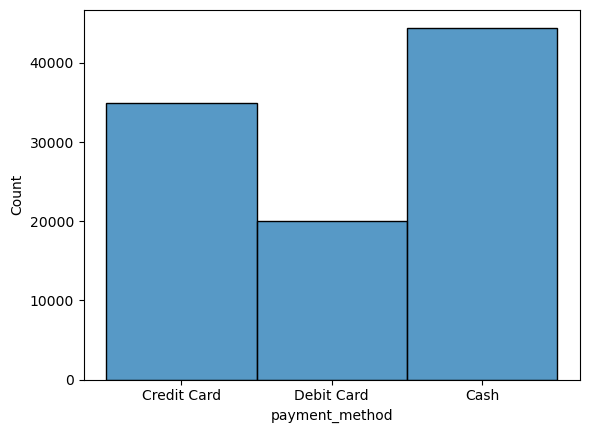

In [63]:
sns.histplot(data=df,x='payment_method')

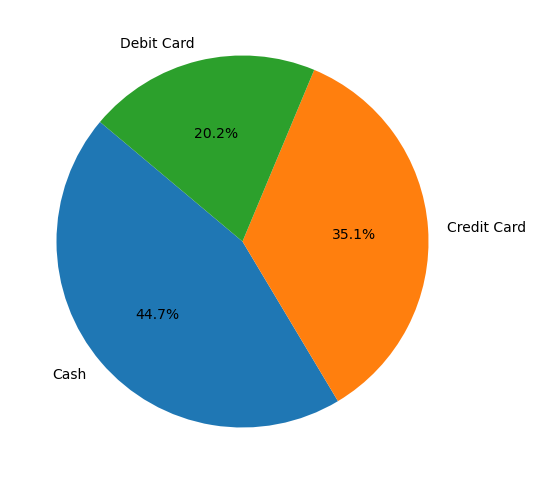

In [67]:
payment_counts = df['payment_method'].value_counts()
plt.figure(figsize=(6, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

In [71]:
pd.crosstab([df.gender,df.AgeRange],df.payment_method)

payment_method   Cash  Credit Card  Debit Card
gender AgeRange                               
Female 0-20      1469         1187         658
       21-30     5149         4073        2375
       31-40     5142         4096        2324
       41-50     5027         4071        2300
       51-60     5057         3999        2301
       61+       4665         3585        2004
Male   0-20      1033          811         466
       21-30     3526         2714        1563
       31-40     3476         2675        1553
       41-50     3437         2629        1602
       51-60     3366         2631        1578
       61+       3100         2460        1355

C:\Users\barad\AppData\Local\Temp\ipykernel_16116\627427402.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crosstab_df, x='gender', y='Credit Card', hue='AgeRange', ci=None)


<Figure size 1000x600 with 0 Axes>

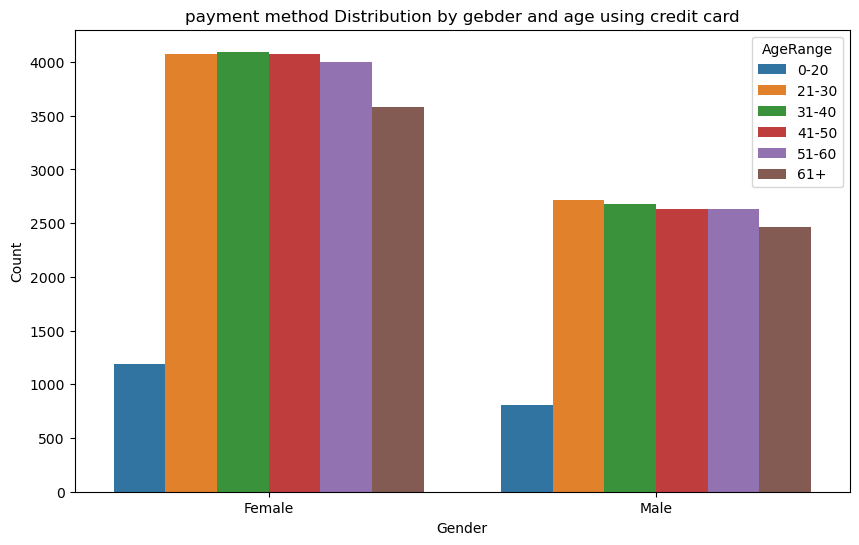

In [75]:
x=pd.crosstab([df['gender'], df['AgeRange']], df['payment_method'])
crosstab_df = x.reset_index()
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

sns.barplot(data=crosstab_df, x='gender', y='Credit Card', hue='AgeRange', ci=None)

plt.title('payment method Distribution by gebder and age using credit card')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\barad\AppData\Local\Temp\ipykernel_16116\1699336583.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crosstab_df, x='gender', y='Debit Card', hue='AgeRange', ci=None)


<Figure size 1000x600 with 0 Axes>

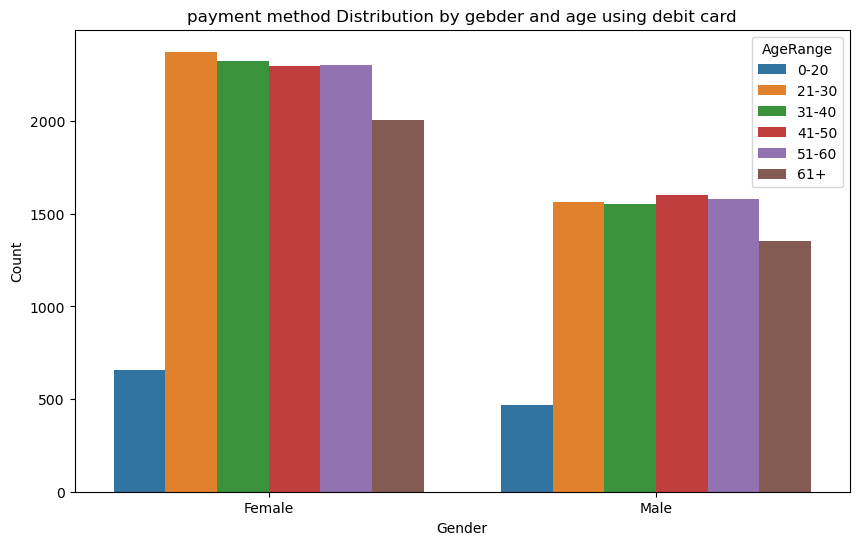

In [77]:
x=pd.crosstab([df['gender'], df['AgeRange']], df['payment_method'])
crosstab_df = x.reset_index()
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

sns.barplot(data=crosstab_df, x='gender', y='Debit Card', hue='AgeRange', ci=None)

plt.title('payment method Distribution by gebder and age using debit card')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [81]:
y=pd.crosstab([df.gender,df.AgeRange],df.category,values=df.price,aggfunc='mean')
crosstab_df2 = y.reset_index()
crosstab_df2

category,gender,AgeRange,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
0,Female,0-20,47.429830,893.040137,126.842433,15.288484,1822.994755,34.236937,3005.172414,109.608834
1,Female,21-30,46.703217,911.170800,122.784011,15.813543,1800.510000,35.821919,3182.758621,107.636458
2,Female,31-40,46.900532,890.232354,123.763943,15.903285,1807.402412,35.190000,3156.930693,107.427070
3,Female,41-50,44.630366,897.366974,120.016777,15.600413,1790.276922,34.793434,3187.837838,108.234315
4,Female,51-60,44.089701,908.368924,121.218922,15.576098,1789.492893,34.902969,3155.585106,107.142406
5,Female,61+,46.016944,902.710846,121.902700,15.502015,1812.096293,33.779579,3166.733068,110.046753
6,Male,0-20,47.461062,869.376753,118.153176,15.586873,1884.744386,35.992051,2953.738318,107.962469
7,Male,21-30,45.341786,886.736958,121.437384,15.676624,1838.616032,34.788711,3075.785340,106.597647
8,Male,31-40,45.013743,894.144086,124.021506,15.690000,1829.163277,34.549653,3136.875000,105.799680
9,Male,41-50,45.210158,915.283000,122.644836,15.442288,1840.209961,34.648125,3144.878049,107.894308


### Visualizing Shopping malls

In [85]:
df.shopping_mall.value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

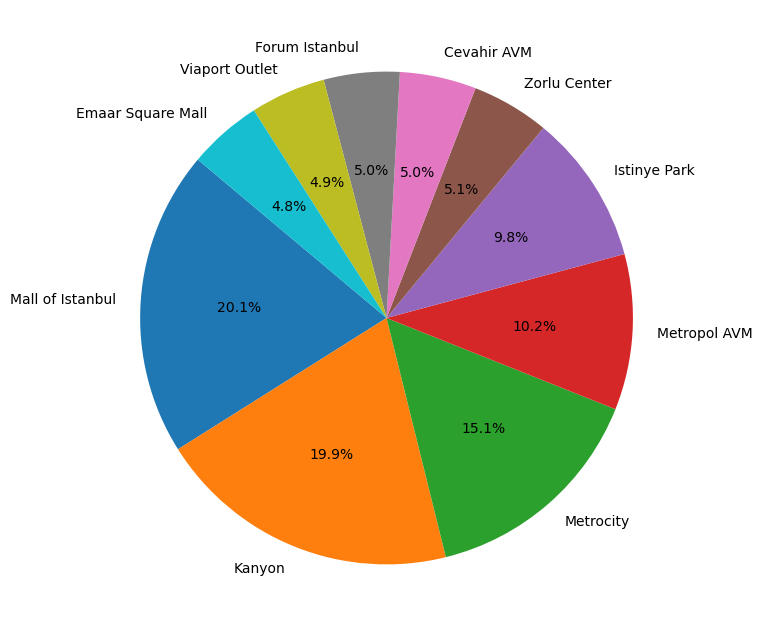

In [87]:
mall_counts=df.shopping_mall.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mall_counts,labels=mall_counts.index, autopct='%0.1f%%', startangle=140)
plt.show()


In [89]:
pd.crosstab([df.gender,df.AgeRange],df.shopping_mall)

shopping_mall    Cevahir AVM  Emaar Square Mall  Forum Istanbul  Istinye Park  \
gender AgeRange                                                                 
Female 0-20              176                141             167           335   
       21-30             575                539             613          1153   
       31-40             601                579             558          1114   
       41-50             569                534             559          1100   
       51-60             551                552             589          1126   
       61+               468                497             530          1046   
Male   0-20               93                113             127           242   
       21-30             441                367             349           760   
       31-40             388                404             377           757   
       41-50             383                382             366           771   
       51-60             383                373             345           720   
       61+               363                330             367           657   

shopping_mall    Kanyon  Mall of Istanbul  Metrocity  Metropol AVM  \
gender AgeRange                                                      
Female 0-20         641               664        512           334   
       21-30       2308              2325       1757          1245   
       31-40       2306              2282       1686          1237   
       41-50       2310              2249       1734          1190   
       51-60       2289              2261       1717          1144   
       61+         2052              2121       1535           994   
Male   0-20         464               450        333           249   
       21-30       1508              1607       1161           770   
       31-40       1517              1541       1167           769   
       41-50       1554              1563       1167           747   
       51-60       1520              1520       1173           757   
       61+         1354              1360       1069           725   

shopping_mall    Viaport Outlet  Zorlu Center  
gender AgeRange                                
Female 0-20                 169           175  
       21-30                543           539  
       31-40                606           593  
       41-50                560           593  
       51-60                562           566  
       61+                  509           502  
Male   0-20                 120           119  
       21-30                418           422  
       31-40                385           399  
       41-50                340           395  
       51-60                372           412  
       61+                  330           360